## Code to read in the NDVI calculated for the two datasets and visualise them together

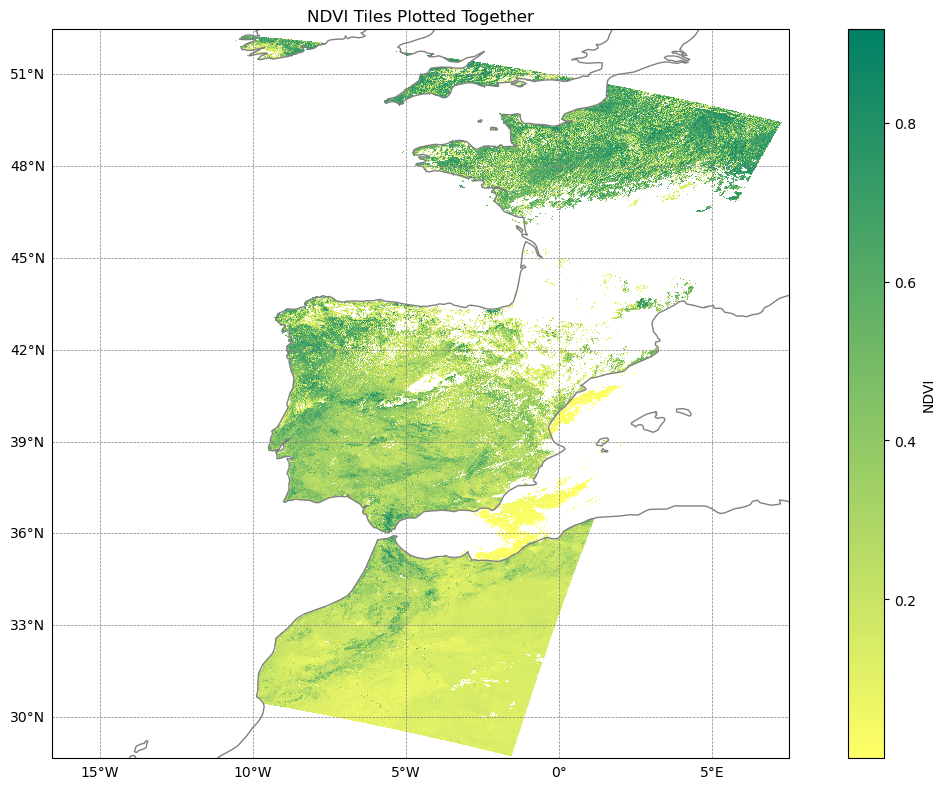

Elapsed time: 58.53 seconds


In [4]:
import dask.array as da
import numpy as np
import math
from time import time
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import cartopy.crs as ccrs
import cartopy.feature as cfeature

start_time = time()
# Load both NDVI files
ds1 = xr.open_dataset("NDVI_2160.nc")
ds2 = xr.open_dataset("NDVI_2340.nc")

# Extract lat, lon, and NDVI
lat1, lon1, ndvi1 = ds1['latitude'], ds1['longitude'], ds1['NDVI']
lat2, lon2, ndvi2 = ds2['latitude'], ds2['longitude'], ds2['NDVI']

# Create map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))

# Plot both tiles
ax.pcolormesh(lon1, lat1, ndvi1.where(ndvi1>0, np.nan), cmap='summer_r', shading='auto', transform=ccrs.PlateCarree())
ax.pcolormesh(lon2, lat2, ndvi2.where(ndvi2>0, np.nan), cmap='summer_r', shading='auto', transform=ccrs.PlateCarree())

# Add map features
ax.coastlines(color='gray')
gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', linewidth=0.5)
gl.top_labels = gl.right_labels = False

ax.set_title("NDVI Tiles Plotted Together")

plt.colorbar(ax.collections[0], ax=ax, label='NDVI')
plt.tight_layout()
plt.savefig("ndvi_tiles.tiff", format='tiff', dpi=300, bbox_inches='tight')
plt.show()
end_time = time()
print(f"Elapsed time: {end_time - start_time:.2f} seconds")